In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from matplotlib import rcParams
import numpy as np
import os

In [2]:
plt.rc('font', family='Malgun Gothic')

In [3]:
station_list=[]
for i in os.listdir("./station_list"):
    station_list.append(i)

In [4]:
def read_csv_ym(station_name, year, month):
    if year != '2020':
        df1 = pd.read_csv(f'station_list/{station_name}/{year}/{station_name}_{year}_{month}.csv')
    else:
        df1 = pd.read_csv(f'station_list/{station_name}/{year}/{station_name}_2020_1.csv')
    return df1

In [43]:
def make_si_list(df, pm):
    resultArr = np.zeros((25,32))
    if pm == 10:
        # DataFrame.'특성명'.'데이터'.'행렬'.'transpose'
        pm10_Arr = df.pm10.values.reshape(31,24).T
        # 행렬 연산을 통해 위의 24x31행렬을 25x32행렬로 확장해줌
        resultArr[1:,:-1] = resultArr[1:,1:] + pm10_Arr
        return resultArr.tolist()
    elif pm == 2.5:
        pm25_Arr = df.pm25.values.reshape(31,24).T
        resultArr[1:,1:] = resultArr[1:,1:] + pm25_Arr
        return resultArr.tolist()
    else:
        print('check your pm!!!')

In [52]:
resultArr = np.zeros((25,31))

In [53]:
len(resultArr[0])

31

In [54]:
pm10_Arr = df1.pm10.values.reshape(31,24).T

In [55]:
len(pm10_Arr[0])

31

In [58]:
resultArr[1:,:] = resultArr[1:,:] + pm10_Arr

In [59]:
len(resultArr[0])

31

In [38]:
df1 = read_csv_ym('Yongsan_Hangandaero','2019','1')
df2 = read_csv_ym('Yongsan_Hannamdaero','2019','1')

In [39]:
make_si_list(df1, 10)[1] # 1시
make_si_list(df1, 10)[2] # 2시
make_si_list(df1, 10)[3] # 3시

ValueError: could not broadcast input array from shape (24,31) into shape (24,30)

In [40]:
hangangdaero = make_si_list(df1, 10)

ValueError: could not broadcast input array from shape (24,31) into shape (24,30)

In [36]:
hangangdaero[12]

[36.0,
 35.0,
 43.0,
 94.0,
 60.0,
 83.0,
 52.0,
 47.0,
 68.0,
 65.0,
 97.0,
 140.0,
 136.0,
 177.0,
 149.0,
 nan,
 74.0,
 75.0,
 131.0,
 67.0,
 47.0,
 103.0,
 126.0,
 50.0,
 56.0,
 49.0,
 55.0,
 135.0,
 103.0,
 86.0,
 101.0,
 0.0]

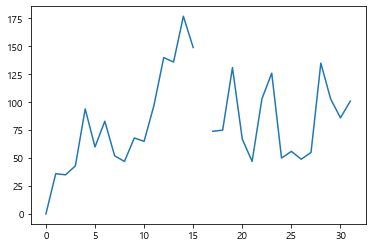

In [23]:
plt.plot(hangangdaero[12])